<a href="https://colab.research.google.com/github/Chathura-Jayasinghe/EN3150_Assignment_03/blob/main/cnn_group_minions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the input data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)  # Add the channel dimension
test_images = test_images.reshape(-1, 28, 28, 1)

In [39]:
# Define the CNN model
model = keras.Sequential([
    # First Convolutional Layer with 32 filters and a 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer with 64 filters and a 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Flatten the 2D feature maps to a 1D array
    layers.Flatten(),

    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),

    # Add another dense layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Add the output layer with 10 units (one for each class) and softmax activation
    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
learning_rate = 0.0001

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Combine training and testing data
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# First, split the data into 60% training and 40% for validation+testing
train_images, val_test_images, train_labels, val_test_labels = train_test_split(
    images, labels, test_size=0.4, random_state=42
)

# Now split the remaining 40% into 20% validation and 20% testing
val_images, test_images, val_labels, test_labels = train_test_split(
    val_test_images, val_test_labels, test_size=0.5, random_state=42
)

# Train the model using the explicit validation set
history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(val_images, val_labels),
    batch_size=1024,
    verbose=2
)

Epoch 1/20
33/33 - 6s - 177ms/step - accuracy: 0.9484 - loss: 0.1783 - val_accuracy: 0.9511 - val_loss: 0.1629
Epoch 2/20
33/33 - 1s - 25ms/step - accuracy: 0.9524 - loss: 0.1619 - val_accuracy: 0.9546 - val_loss: 0.1521
Epoch 3/20
33/33 - 1s - 21ms/step - accuracy: 0.9557 - loss: 0.1494 - val_accuracy: 0.9577 - val_loss: 0.1414
Epoch 4/20
33/33 - 1s - 21ms/step - accuracy: 0.9595 - loss: 0.1388 - val_accuracy: 0.9602 - val_loss: 0.1330
Epoch 5/20
33/33 - 1s - 18ms/step - accuracy: 0.9622 - loss: 0.1295 - val_accuracy: 0.9635 - val_loss: 0.1257
Epoch 6/20
33/33 - 1s - 19ms/step - accuracy: 0.9644 - loss: 0.1215 - val_accuracy: 0.9644 - val_loss: 0.1178
Epoch 7/20
33/33 - 1s - 18ms/step - accuracy: 0.9666 - loss: 0.1147 - val_accuracy: 0.9655 - val_loss: 0.1149
Epoch 8/20
33/33 - 1s - 19ms/step - accuracy: 0.9676 - loss: 0.1084 - val_accuracy: 0.9658 - val_loss: 0.1099
Epoch 9/20
33/33 - 1s - 18ms/step - accuracy: 0.9693 - loss: 0.1037 - val_accuracy: 0.9676 - val_loss: 0.1059
Epoch 10/

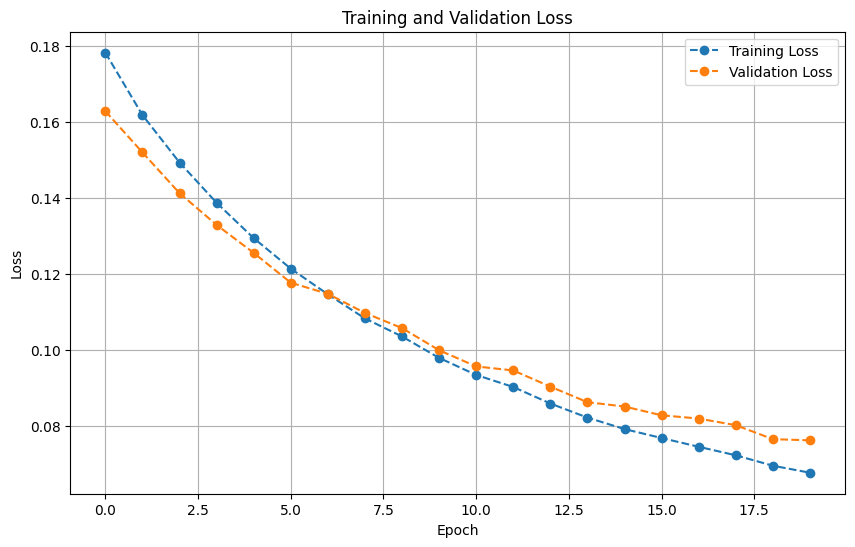

In [53]:
import matplotlib.pyplot as plt
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9480 - loss: 0.1886
Test Loss: 0.191698357462883
Test Accuracy: 0.946142852306366


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of test_labels: (14000,)
Classification Report as Table:

              precision    recall  f1-score       support
Class 0        0.967179  0.976039  0.971589   1419.000000
Class 1        0.972050  0.973864  0.972956   1607.000000
Class 2        0.939680  0.921597  0.930551   1403.000000
Class 3        0.940552  0.924843  0.932632   1437.000000
Class 4        0.964150  0.953243  0.958665   1326.000000
Class 5        0.936558  0.945556  0.941036   1249.000000
Class 6        0.950329  0.962990  0.956618   1351.000000
Class 7        0.956134  0.937500  0.946725   1488.000000
Class 8        0.917995  0.916603  0.917299   1319.000000
Class 9        0.911846  0.945039  0.928146   1401.000000
accuracy       0.946143  0.946143  0.946143      0.946143
macro avg      0.945647  0.945728  0.945622  14000.000000
weighted avg   0.946259  0.946143  0.946135  14000.000000


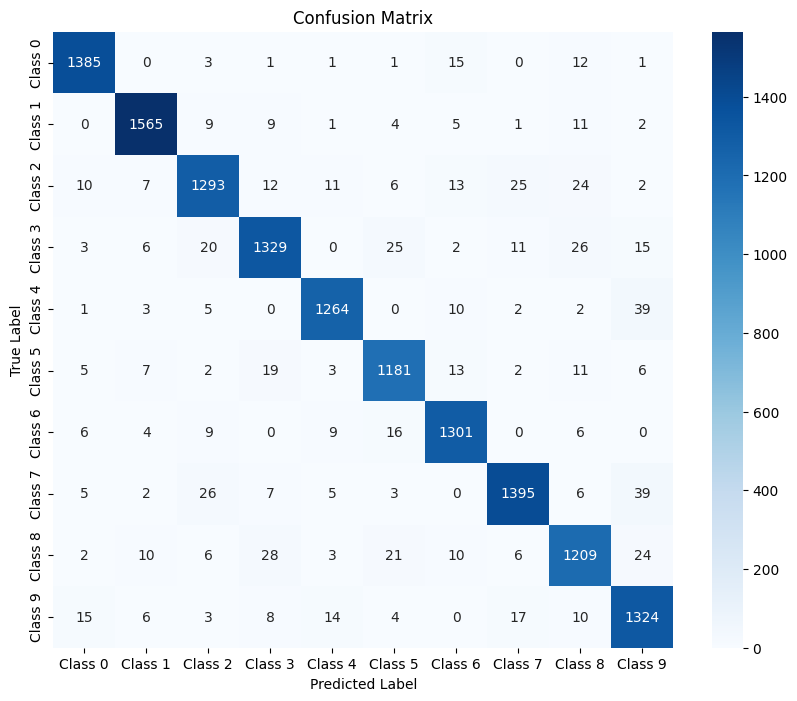

In [49]:
# Get predictions for the test set
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)  # Get class labels

# Shape of test_labels is already 1D (not one-hot encoded)
print("Shape of test_labels:", test_labels.shape)
test_labels_classes = test_labels  # It's already in class label format

# Generate classification report
report_dict = classification_report(test_labels_classes, test_predictions_classes,
                                     target_names=[f'Class {i}' for i in range(10)],
                                     output_dict=True)

# Convert the report to a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the report as a table
print("Classification Report as Table:\n")
print(report_df)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels_classes, test_predictions_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {i}' for i in range(10)],
            yticklabels=[f'Class {i}' for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Saving Screenshot 2024-12-10 230129.png to Screenshot 2024-12-10 230129.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


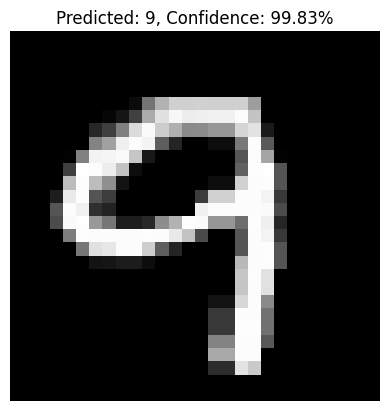

File: Screenshot 2024-12-10 230129.png
Predicted class: 9
Confidence: 99.83%


In [56]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Upload an image
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Step 1: Read the image
img = cv2.imread(filename)

# Step 2: Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Resize to 28x28 pixels (MNIST model input size)
resized_img = cv2.resize(gray_img, (28, 28))

# Step 4: Normalize the pixel values to [0, 1]
normalized_img = resized_img / 255.0

# Step 5: Reshape to add batch dimension and channel
input_image = normalized_img.reshape(1, 28, 28, 1)  # Shape: (1, 28, 28, 1)

# Step 6: Predict the digit using the model
prediction = model.predict([input_image])
predicted_class = np.argmax(prediction, axis=1)[0]  # Get the predicted class
confidence = prediction[0][predicted_class] * 100  # Get confidence score

# Display the image
plt.imshow(resized_img, cmap='gray')
plt.axis('off')
plt.title(f"Predicted: {predicted_class}, Confidence: {confidence:.2f}%")
plt.show()

# Print detailed results
print(f"File: {filename}")
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")
